# Verification of the BSD formula for congruent number curves

Recently Alex smith proved results regarding which congruent number curves satisfy the BSD formula. He also proved density results regarding congruent numbers. These results are empirically verified in this notebook. 

In [2]:
# Cell 1: Imports
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
import seaborn as sns

# Prettify plots
sns.set(style="whitegrid")

In [3]:
# Cell 2: Load your CSV file (update filename if needed)

smithcols = ['n', 'reg', '2selmer_rank', 'iscongruent', 'mod8', 'tamagawa', 'omega', 'special']

df = pd.read_csv("bsd_sqf1mil.csv", usecols=smithcols)

# Hardcode torsion = 4 for congruent number curves
TORSION_ORDER = 4
TORSION_SQ = TORSION_ORDER ** 2

df

,n,reg,2selmer_rank,iscongruent,mod8,tamagawa,omega,special
0,1,1.000000,2,0,1,2,5.244115,0.655514
1,2,1.000000,2,0,2,4,3.708149,0.927037
2,3,1.000000,2,0,3,8,3.027691,1.513846
3,5,1.899482,3,1,5,8,2.345240,2.227370
4,6,0.888626,3,1,6,16,2.140901,1.902460
...,...,...,...,...,...,...,...,...
195795,322055,152.918776,3,1,7,128,0.009241,11.304673
195796,322057,1.000000,4,0,1,8,0.009241,0.665332
195797,322058,1.000000,2,0,2,64,0.009241,0.036963
195798,322059,1.000000,4,0,3,128,0.009241,0.295702


In [4]:
# Cell 3: Compute normalized BSD quantity ℒ(E(n)) = L * torsion^2 / (Ω * Tamagawa)

# Compute ℒ(E(n)) = (L * 16) / (real_period * tamagawa)
def compute_l_bsd(row):
    try:
        return (row['special'] * 16) / (row['omega'] * row['tamagawa'])
    except (ZeroDivisionError, ValueError):
        return None

df['L_BSD'] = df.apply(compute_l_bsd, axis=1)
df = df[df['L_BSD'].notnull()]

In [6]:
# Check whether L_BSD is an odd rational number
def is_odd(frac):
    x = int(round(frac))
    return x % 2 == 1

df['L_BSD_odd'] = (df['L_BSD'].apply(is_odd))
#df['s2parity'] = df['2selmer_rank']%2 == 1
df['Conj1.1_verified'] = df.apply(
    lambda row: row['L_BSD_odd'] and (row['2selmer_rank'] == 2),
    axis=1
)
df

,n,reg,2selmer_rank,iscongruent,mod8,tamagawa,omega,special,L_BSD,L_BSD_odd,s2parity,Conj1.1_verified
0,1,1.000000,2,0,1,2,5.244115,0.655514,1.000000,True,False,True
1,2,1.000000,2,0,2,4,3.708149,0.927037,1.000000,True,False,True
2,3,1.000000,2,0,3,8,3.027691,1.513846,1.000000,True,False,True
3,5,1.899482,3,1,5,8,2.345240,2.227370,1.899482,False,True,False
4,6,0.888626,3,1,6,16,2.140901,1.902460,0.888626,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195795,322055,152.918776,3,1,7,128,0.009241,11.304673,152.918776,True,True,False
195796,322057,1.000000,4,0,1,8,0.009241,0.665332,144.000000,False,False,False
195797,322058,1.000000,2,0,2,64,0.009241,0.036963,1.000000,True,False,True
195798,322059,1.000000,4,0,3,128,0.009241,0.295702,4.000000,False,False,False


In [7]:
# Cell 6: Summary statistics overall
total = len(df)
satisfied = df['Conj1.1_verified'].sum()
print(f" Conjecture 1.1 verified in {satisfied} of {total} cases ({100 * satisfied / total:.2f}%)")

 Conjecture 1.1 verified in 48305 of 195800 cases (24.67%)


In [8]:
# Cell 7: Summary by mod 8 residue class
summary_by_mod8 = df.groupby('mod8')['Conj1.1_verified'].agg(['mean', 'count']).reset_index()
summary_by_mod8['percentage'] = 100 * summary_by_mod8['mean']

summary_by_mod8


,mod8,mean,count,percentage
0,1,0.315896,32631,31.589593
1,2,0.547934,32628,54.793429
2,3,0.616504,32634,61.650426
3,5,0.000000,32636,0.000000
4,6,0.000000,32634,0.000000
5,7,0.000000,32637,0.000000


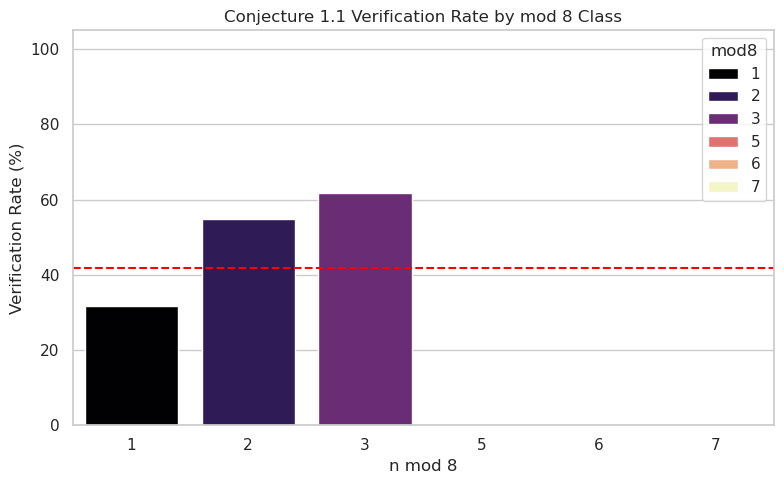

In [28]:
# Cell 8: Bar plot of verification rate by mod 8 residue
plt.figure(figsize=(8, 5))
sns.barplot(data=summary_by_mod8, x='mod8', y='percentage', palette='magma', hue='mod8')

plt.title("Conjecture 1.1 Verification Rate by mod 8 Class")
plt.ylabel("Verification Rate (%)")
plt.xlabel("n mod 8")
plt.ylim(0, 105)
plt.axhline(41.9, color='red', linestyle='--', label='Smith Threshold (41.9%)')
plt.tight_layout()
plt.savefig("bsdverify1.jpeg")
plt.show()


In [10]:
# Filter to analytic rank 0 curves (regulator = 0)
df_rank0 = df[df['reg'] == 1].copy()

print(f"{len(df_rank0)} of {len(df)} curves have analytic rank 0 (i.e., regulator = 1).")


87312 of 195800 curves have analytic rank 0 (i.e., regulator = 1).


In [11]:
# Compare verification rate by selmer2_rank within analytic rank 0 curves
selmer_summary = (
    df_rank0.groupby('2selmer_rank')['Conj1.1_verified']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'mean': 'verification_rate'})
)
selmer_summary['percentage'] = 100 * selmer_summary['verification_rate']

selmer_summary

,2selmer_rank,count,verification_rate,percentage
0,2,48305,1.0,100.0
1,4,37913,0.0,0.0
2,6,1094,0.0,0.0


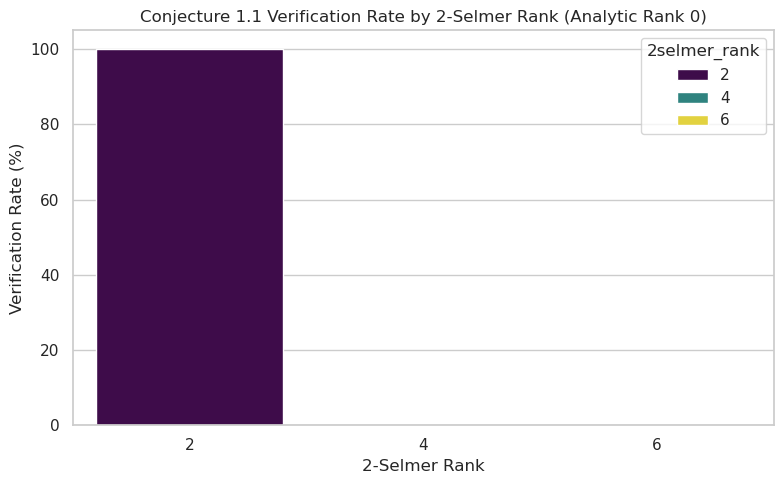

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=selmer_summary, x='2selmer_rank', y='percentage', hue = '2selmer_rank', palette='viridis')

plt.title("Conjecture 1.1 Verification Rate by 2-Selmer Rank (Analytic Rank 0)")
plt.xlabel("2-Selmer Rank")
plt.ylabel("Verification Rate (%)")
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

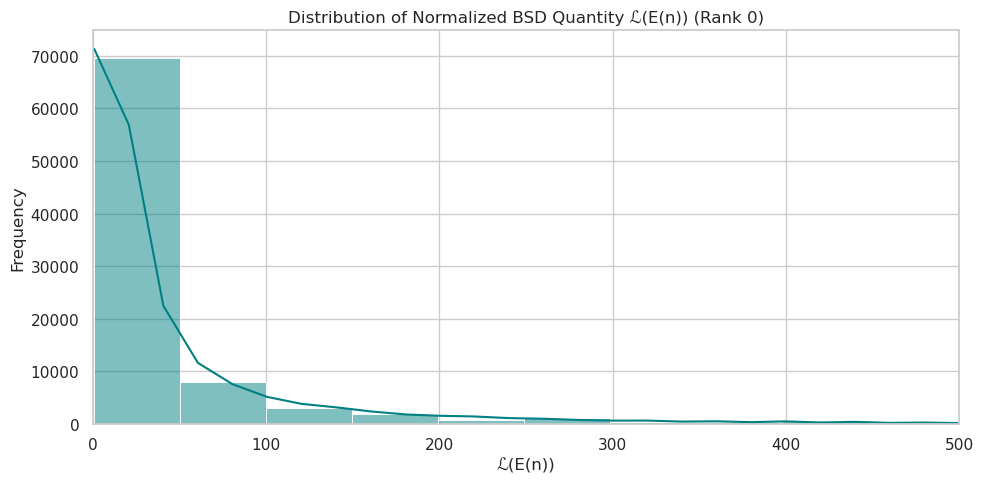

In [13]:
plt.figure(figsize=(10, 5))
l_values = [float(x) for x in df_rank0['L_BSD'] ]

sns.histplot(l_values, bins=80, kde=True, color='teal')
plt.xlim(0, 500)
plt.title("Distribution of Normalized BSD Quantity ℒ(E(n)) (Rank 0)")
plt.xlabel("ℒ(E(n))")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [14]:
from math import isqrt

def is_perfect_square(frac):
    """Check if a Fraction is a positive perfect square integer"""
    root = isqrt(round(frac))
    return root * root == round(frac)

# Filter to relevant cases:
df_c13 = df[
    (df['reg'] == 1) & 
    (df['2selmer_rank'] == 2) & 
    (df['mod8'].isin([1, 2, 3]))
].copy()

# Check for perfect square L_BSD values
df_c13['l_bsd_int'] = df_c13['L_BSD'].round().astype(int)
df_c13

,n,reg,2selmer_rank,iscongruent,mod8,tamagawa,omega,special,L_BSD,L_BSD_odd,s2parity,Conj1.1_verified,l_bsd_int
0,1,1.0,2,0,1,2,5.244115,0.655514,1.0,True,False,True,1
1,2,1.0,2,0,2,4,3.708149,0.927037,1.0,True,False,True,1
2,3,1.0,2,0,3,8,3.027691,1.513846,1.0,True,False,True,1
6,10,1.0,2,0,2,16,1.658335,1.658335,1.0,True,False,True,1
7,11,1.0,2,0,3,8,1.581160,0.790580,1.0,True,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195786,322041,1.0,2,0,1,32,0.009241,0.166337,9.0,True,False,True,9
195788,322043,1.0,2,0,3,32,0.009241,0.166337,9.0,True,False,True,9
195791,322049,1.0,2,0,1,128,0.009241,0.665340,9.0,True,False,True,9
195792,322051,1.0,2,0,3,8,0.009241,0.004620,1.0,True,False,True,1


In [15]:
df_c13['L_BSD_is_square'] = df_c13['l_bsd_int'].apply(is_perfect_square)

# Summary
total = len(df_c13)
satisfied = df_c13['L_BSD_is_square'].sum()
percentage = 100 * satisfied / total if total else 0

print(f"✅ Corollary 1.3 verified in {satisfied} of {total} cases ({percentage:.2f}%)")

✅ Corollary 1.3 verified in 48305 of 48305 cases (100.00%)


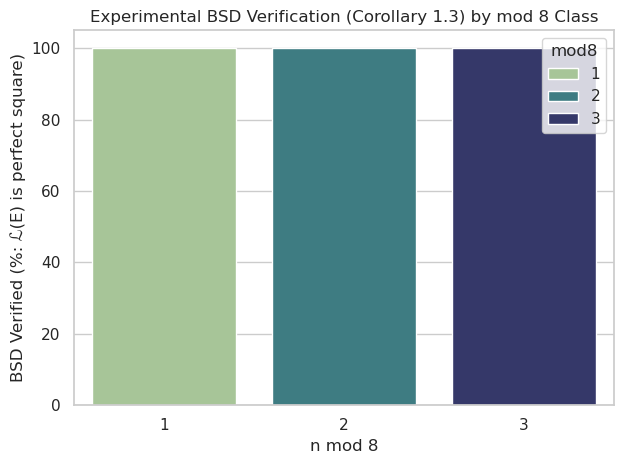

In [16]:
summary_c13_mod8 = df_c13.groupby('mod8')['L_BSD_is_square'].agg(['mean', 'count']).reset_index()
summary_c13_mod8['percentage'] = 100 * summary_c13_mod8['mean']

sns.barplot(data=summary_c13_mod8, x='mod8', y='percentage', hue='mod8', palette='crest')
plt.title("Experimental BSD Verification (Corollary 1.3) by mod 8 Class")
plt.xlabel("n mod 8")
plt.ylabel("BSD Verified (%: ℒ(E) is perfect square)")
plt.ylim(0, 105)
plt.tight_layout()
plt.show()


In [19]:
# Filter to squarefree n ≡ 1, 2, 3 mod 8
df_even_mod8 = df[df['mod8'].isin([1, 2, 3])]

# Among those, count how many have 2-Selmer rank = 2 (i.e., generated by torsion)
selmer2_is_2 = df_even_mod8['2selmer_rank'] == 2
num_selmer2_eq_2 = selmer2_is_2.sum()
total_mod8_even = len(df_even_mod8)

# Compute proportion
proportion = 100 * num_selmer2_eq_2 / total_mod8_even if total_mod8_even else 0

print(f"✅ Among n ≡ 1,2,3 mod 8: {num_selmer2_eq_2} out of {total_mod8_even} have Selmer rank = 2")
print(f"→ That is {proportion:.2f}% (expected ≥ 41.9%)")

# Optional assertion to highlight whether it meets Smith's bound
if proportion >= 41.9:
    print("✅ Result agrees with Smith's lower bound.")
else:
    print("❌ Less than expected. Investigate data/sample size.")


✅ Among n ≡ 1,2,3 mod 8: 48305 out of 97893 have Selmer rank = 2
→ That is 49.34% (expected ≥ 41.9%)
✅ Result agrees with Smith's lower bound.


,mod8,total,selmer2=2,proportion_%
0,1,32631,10308,31.59
1,2,32628,17878,54.79
2,3,32634,20119,61.65


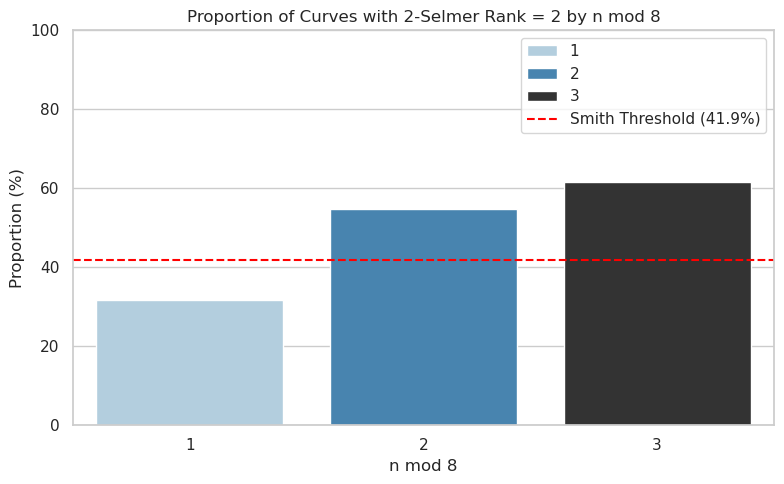

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by mod 8 residue
mod8_groups = df_even_mod8.groupby('mod8')

# Compute count and proportion of Selmer rank = 2 in each class
results = []
for residue, group in mod8_groups:
    total = len(group)
    selmer2 = (group['2selmer_rank'] == 2).sum()
    proportion = 100 * selmer2 / total if total > 0 else 0
    results.append({'mod8': residue, 'total': total, 'selmer2=2': selmer2, 'proportion_%': proportion})

# Create dataframe
mod8_table = pd.DataFrame(results).sort_values('mod8').reset_index(drop=True)

# Display table
display(mod8_table.style.format({'proportion_%': '{:.2f}'}).set_caption("Proportion of Selmer Rank = 2 by mod 8 Residue"))

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=mod8_table, x='mod8', y='proportion_%', hue = 'mod8', palette='Blues_d')
plt.title("Proportion of Curves with 2-Selmer Rank = 2 by n mod 8")
plt.xlabel("n mod 8")
plt.ylabel("Proportion (%)")
plt.ylim(0, 100)
plt.axhline(41.9, color='red', linestyle='--', label='Smith Threshold (41.9%)')
plt.legend()
plt.tight_layout()
plt.savefig("bsdmod8.jpeg")
plt.show()


In [17]:
# Filter to squarefree n ≡ 5,6,7 (mod 8)
df_mod567 = df[df['mod8'].isin([5, 6, 7])].copy()

# Compute congruent number density in each residue class
congruent_summary = (
    df_mod567.groupby('mod8')['iscongruent']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'density'})
)
congruent_summary['percentage'] = 100 * congruent_summary['density']

print("✅ Theorem 1.5 verification (empirical density of congruent numbers):")
display(congruent_summary)


✅ Theorem 1.5 verification (empirical density of congruent numbers):


,mod8,density,count,percentage
0,5,1.0,32636,100.0
1,6,1.0,32634,100.0
2,7,1.0,32637,100.0


In [18]:
# Theoretical lower bounds from Theorem 1.5
lower_bounds = {5: 62.9, 6: 41.9, 7: 62.9}
congruent_summary['theoretical_bound'] = congruent_summary['mod8'].map(lower_bounds)
congruent_summary['empirical ≥ bound'] = congruent_summary['percentage'] >= congruent_summary['theoretical_bound']

display(congruent_summary)

,mod8,density,count,percentage,theoretical_bound,empirical ≥ bound
0,5,1.0,32636,100.0,62.9,True
1,6,1.0,32634,100.0,41.9,True
2,7,1.0,32637,100.0,62.9,True
